In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [ ]:
import tensorflow as tf
import copy
import matplotlib.pyplot as plt
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0
#numpy.copy(test_images_old,test_images)
test_images_old = copy.deepcopy(test_images[1])
print(len(test_images))
print("The length of training and test imges ",len(training_images),len(test_images))
training_images = training_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=3,callbacks=[callbacks])



10000
The length of training and test imges  60000 10000
Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1604 - accuracy: 0.9518
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0562 - accuracy: 0.9832
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0343 - accuracy: 0.9893


Moving the evaluation to below of the model. Ideally test_images_old should contain all test images but due to issue with python copy library, only the index we specify is getting copied. Below we are testing and displaying the same.

28 28
[[6.1119152e-07 9.2395878e-04 9.9907541e-01 1.5088103e-08 3.3555716e-09
  4.6338716e-10 2.6804139e-08 2.3671742e-10 9.8266710e-09 2.6965566e-08]]
7


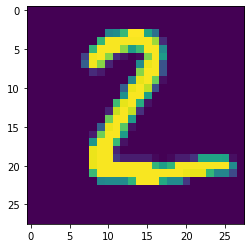

In [ ]:
#model.evaluate(test_images,test_labels)
#print(test_images_old)

print(len(test_images_old),len(test_images_old[0]))
test_images_old = test_images_old.reshape(1,28,28,1)
cl = model.predict(test_images_old)
print(cl)
print(test_labels[0])
plt.imshow(test_images_old.reshape(28,28))